In [0]:
import tensorflow as tf
tf.__version__
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
#import tensorflow.examples.tutorials.mnist as input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True, reshape = False)

In [0]:

print("훈련 이미지 :",  mnist.train.images.shape)
print("훈련 라벨:",  mnist.train.labels.shape)
print("테스트 이미지 : ", mnist.test.images.shape)
print("테스트 라벨 : ", mnist.test.labels.shape)
print("검증 이미지 : ", mnist.validation.images.shape)
print("검증 라벨 : ", mnist.validation.labels.shape)

훈련 이미지 : (55000, 28, 28, 1)
훈련 라벨: (55000, 10)
테스트 이미지 :  (10000, 28, 28, 1)
테스트 라벨 :  (10000, 10)
검증 이미지 :  (5000, 28, 28, 1)
검증 라벨 :  (5000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


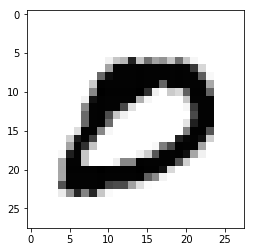

In [0]:
mnist_index = 49999
image = np.reshape(mnist.train.images[mnist_index], [28, 28])
print(mnist.train.labels[mnist_index])
plt.imshow(image, cmap='Greys')
plt.show()

In [0]:
X = tf.placeholder(tf.float32,shape=[None, 28,28,1])
Y = tf.placeholder(tf.float32,shape=[None,10])

In [0]:
w1 = tf.Variable(tf.random_normal(shape=[3,3,1,12],stddev=0.1))
b1 = tf.Variable(tf.random_normal(shape=[12],stddev=0.1))

conv1 = tf.nn.conv2d(X,w1,strides=[1,1,1,1], padding='SAME') + b1
act1 = tf.nn.relu(conv1)
pool1 = tf.nn.max_pool(act1,ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
w2 = tf.Variable(tf.random_normal(shape=[3,3,12,24],stddev=0.1))
b2 = tf.Variable(tf.random_normal(shape=[24],stddev=0.1))

conv2 = tf.nn.conv2d(pool1,w2,strides=[1,1,1,1], padding='SAME') + b2
act2 = tf.nn.relu(conv2)
#pool2 = tf.nn.max_pool(act2,ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

In [0]:
w3 = tf.Variable(tf.random_normal(shape=[3,3,24,48],stddev=0.1))
b3 = tf.Variable(tf.random_normal(shape=[48],stddev=0.1))

conv3 = tf.nn.conv2d(act2,w3,strides=[1,1,1,1], padding='SAME') + b3
act3 = tf.nn.relu(conv3)
pool3 = tf.nn.max_pool(act3,ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

In [0]:
w4 = tf.Variable(tf.random_normal(shape = [7*7*48,10]))
b4 = tf.Variable(tf.random_normal(shape = [10]))

reshape = tf.reshape(pool3, [-1,7*7*48])
out = tf.matmul(reshape,w4) + b4

In [0]:
Loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=out))
train = tf.train.AdamOptimizer(0.004).minimize(Loss)

correct = tf.equal(tf.argmax(out,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
with tf.Session() as sess:
  print("start")
  sess.run(tf.global_variables_initializer())
  for i in range(1000):
    train_data, Y_label = mnist.train.next_batch(64)
    sess.run(train, feed_dict={X:train_data, Y:Y_label})
    if (i%10) == 0:
      print(i, sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
 
    

Label:  [8]


FailedPreconditionError: ignored